In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

random.seed(0)
np.random.seed(0)

## Filter based on floor visibility

The idea is to filter out images where the floor isn't visible at all. We use the semantic labels of the image and its neighbours for  this.

In [7]:
semantics_dir = '/scratch/shantanu/pavani/hm3d_output/hm3d_output/'
data_dir = '/scratch/shantanu/pavani/hm3d_output/hm3d_output/'

In [4]:
floor_label = [3, 28]
frame_ids = [0, -1, 1]
floor_frac_thresh = 0.1  # Only take images with threshold above 0.1

In [5]:
with open('../splits/gibson/gibson_train_depth.txt', 'r') as f:
    train_fps = f.read().splitlines()
    
with open('../splits/gibson/gibson_val_depth.txt', 'r') as f:
    val_fps = f.read().splitlines()

In [ ]:
os.listdir(os.path.join(semantics_dir, 'Corozal', '0', 'left_semantic'))
plt.imshow(cv2.imread(os.path.join(semantics_dir, 'Corozal', '0', 'left_semantic', '751.png'), -1)  == floor_label)

In [28]:
valid_train_fps = []

for fp in train_fps:
    scene, fileidx = fp.split()
    fileidx = int(fileidx)
    avg_floor_frac = 0

    for fid in frame_ids:
        semantics_path = os.path.join(semantics_dir, scene, '0', 'left_semantic', '{}.png'.format(fileidx + fid))
        print(semantics_path)
        semantics_img = cv2.imread(semantics_path, -1)
        floor_frac = np.sum(np.isin(semantics_img, floor_label))/semantics_img.size
        avg_floor_frac += floor_frac / len(frame_ids)

    if avg_floor_frac >= floor_frac_thresh:
        valid_train_fps.append(fp)

/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/282.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/281.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/283.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/446.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/445.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/447.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/360.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/359.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/361.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/204.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/203.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/205.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/277.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/276.png
/scrat

/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/22.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/24.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/340.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/339.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/341.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/411.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/410.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/412.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/516.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/515.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/517.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/0.png
/scratch/shantanu/HabitatGibson/data/Newfields/0/left_semantic/-1.png


AttributeError: 'NoneType' object has no attribute 'size'

In [29]:
len(train_fps), len(valid_train_fps)

(20678, 11900)

In [24]:
valid_val_fps = []

for fp in val_fps:
    scene, fileidx = fp.split()
    fileidx = int(fileidx)
    avg_floor_frac = 0

    for fid in frame_ids:
        semantics_path = os.path.join(semantics_dir, scene, '0', 'left_rgb', '{}.png'.format(fileidx + fid))
        semantics_img = cv2.imread(semantics_path, -1)
        floor_frac = np.sum(semantics_img == floor_label)/semantics_img.size
        avg_floor_frac += floor_frac / len(frame_ids)

    if avg_floor_frac >= floor_frac_thresh:
        valid_val_fps.append(fp)

In [25]:
len(val_fps), len(valid_val_fps)

(2895, 1581)

In [30]:
with open('../splits/gibson/gibson_filtered_train_depth.txt', 'w') as f:
    f.writelines([line+'\n' for line in valid_train_fps])

with open('../splits/gibson/gibson_filtered_val_depth.txt', 'w') as f:
    f.writelines([line+'\n' for line in valid_val_fps])

## Prepare discriminator images using Habitat Train

In [64]:
habitat_train_dir = '/scratch/shantanu/HabitatTrain'

In [65]:
scenes = os.listdir(habitat_train_dir)

In [66]:
fileskip = 5

In [67]:
valid_discr_fps = []

for scene in scenes:
    filenames = sorted(os.listdir(os.path.join(habitat_train_dir, scene, '0', 'map')), 
                       key=lambda x: int(os.path.splitext(x)[0]))
    for idx in range(0, len(filenames), fileskip):
        valid_discr_fps.append('{} {}'.format(scene, idx))
        
len(valid_discr_fps)

38460

In [68]:
random.shuffle(valid_discr_fps)

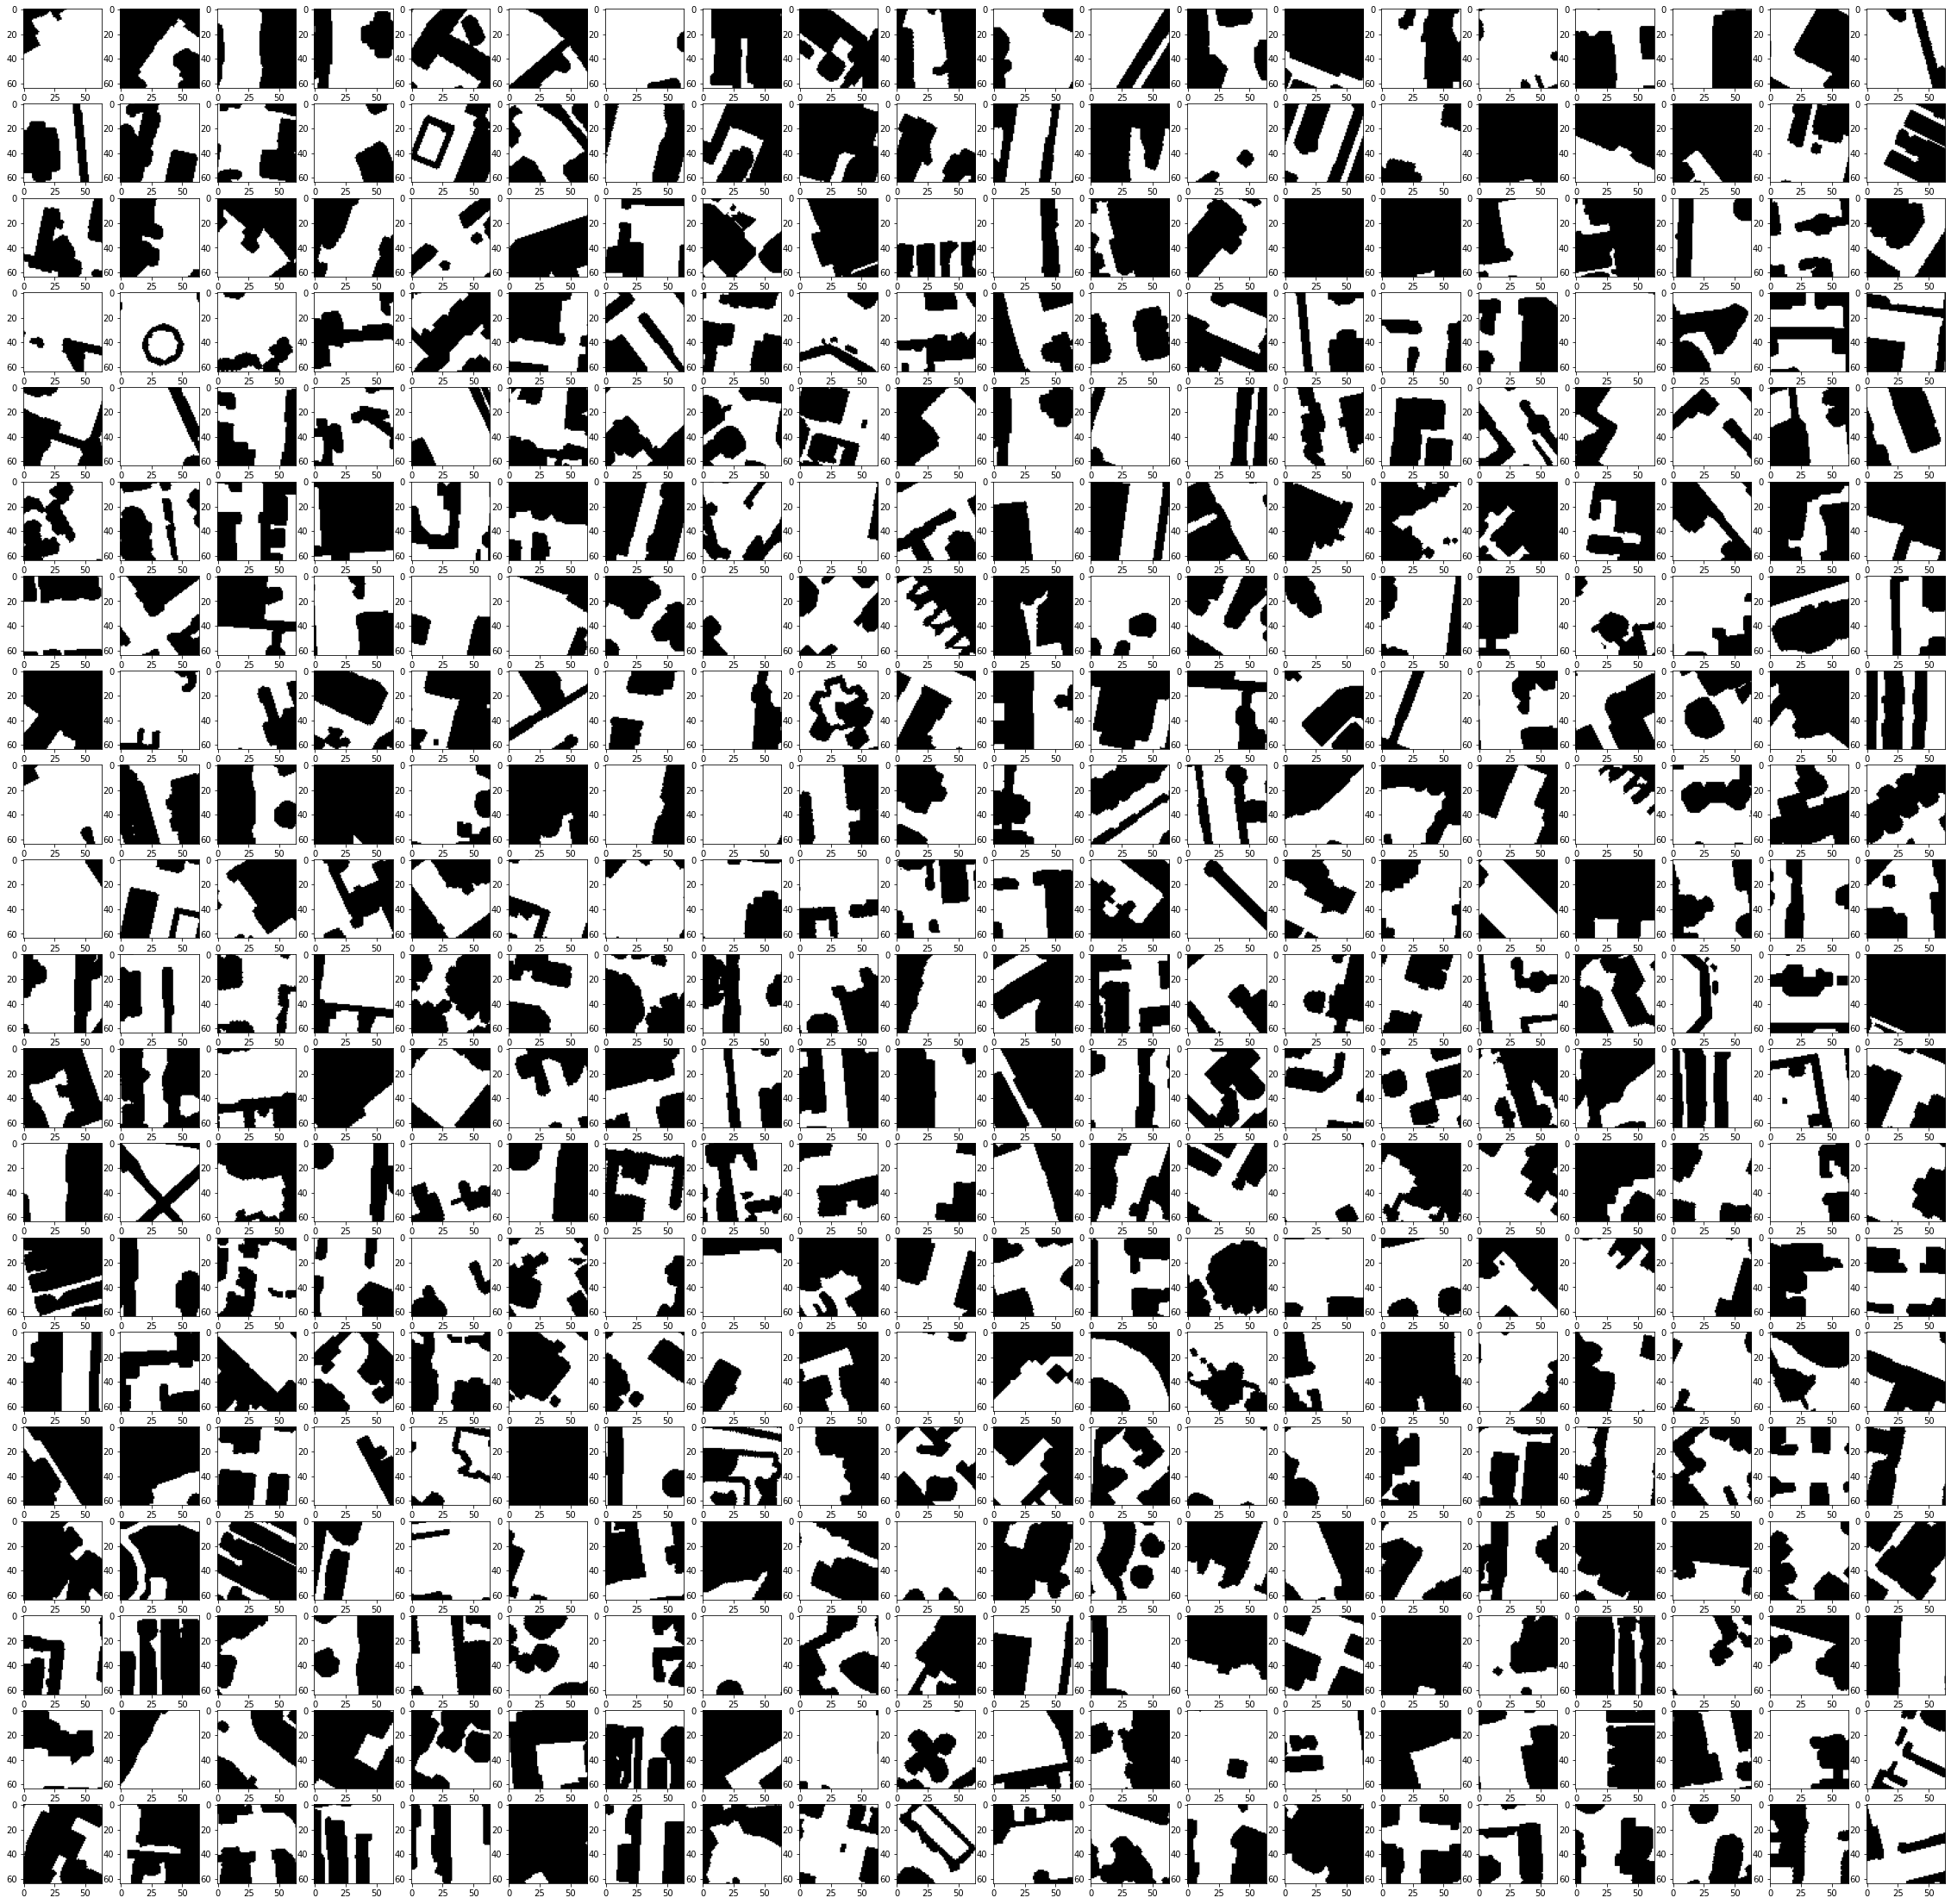

In [69]:
nrows = 20
ncols = 20

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(2*ncols, 2*nrows))
ax = ax.flatten()

for idx in range(nrows * ncols):
    scene, fileidx = valid_discr_fps[idx].split()
    img_path = os.path.join(habitat_train_dir, scene, '0', 'map', f'{fileidx}.png')
    img = cv2.imread(img_path, -1)
    ax[idx].imshow(img, 'gray')
    
plt.show()

In [83]:
max_files = 5000
tgt_dir = '/scratch/shantanu/HabitatGibson/bevs/discr'

os.makedirs(tgt_dir, exist_ok=True)
for idx in range(max_files):
    scene, fileidx = valid_discr_fps[idx].split()
    img_path = os.path.join(habitat_train_dir, scene, '0', 'map', f'{fileidx}.png')
    img = cv2.imread(img_path, -1)
    img[img == 0] = 127 # Offset so that 0 -> 127 (occupied), 255 -> 254 (free)
    img[img == 255] = 254
    out_path = os.path.join(tgt_dir, f'{scene}_{fileidx}.png')
    cv2.imwrite(out_path, img)

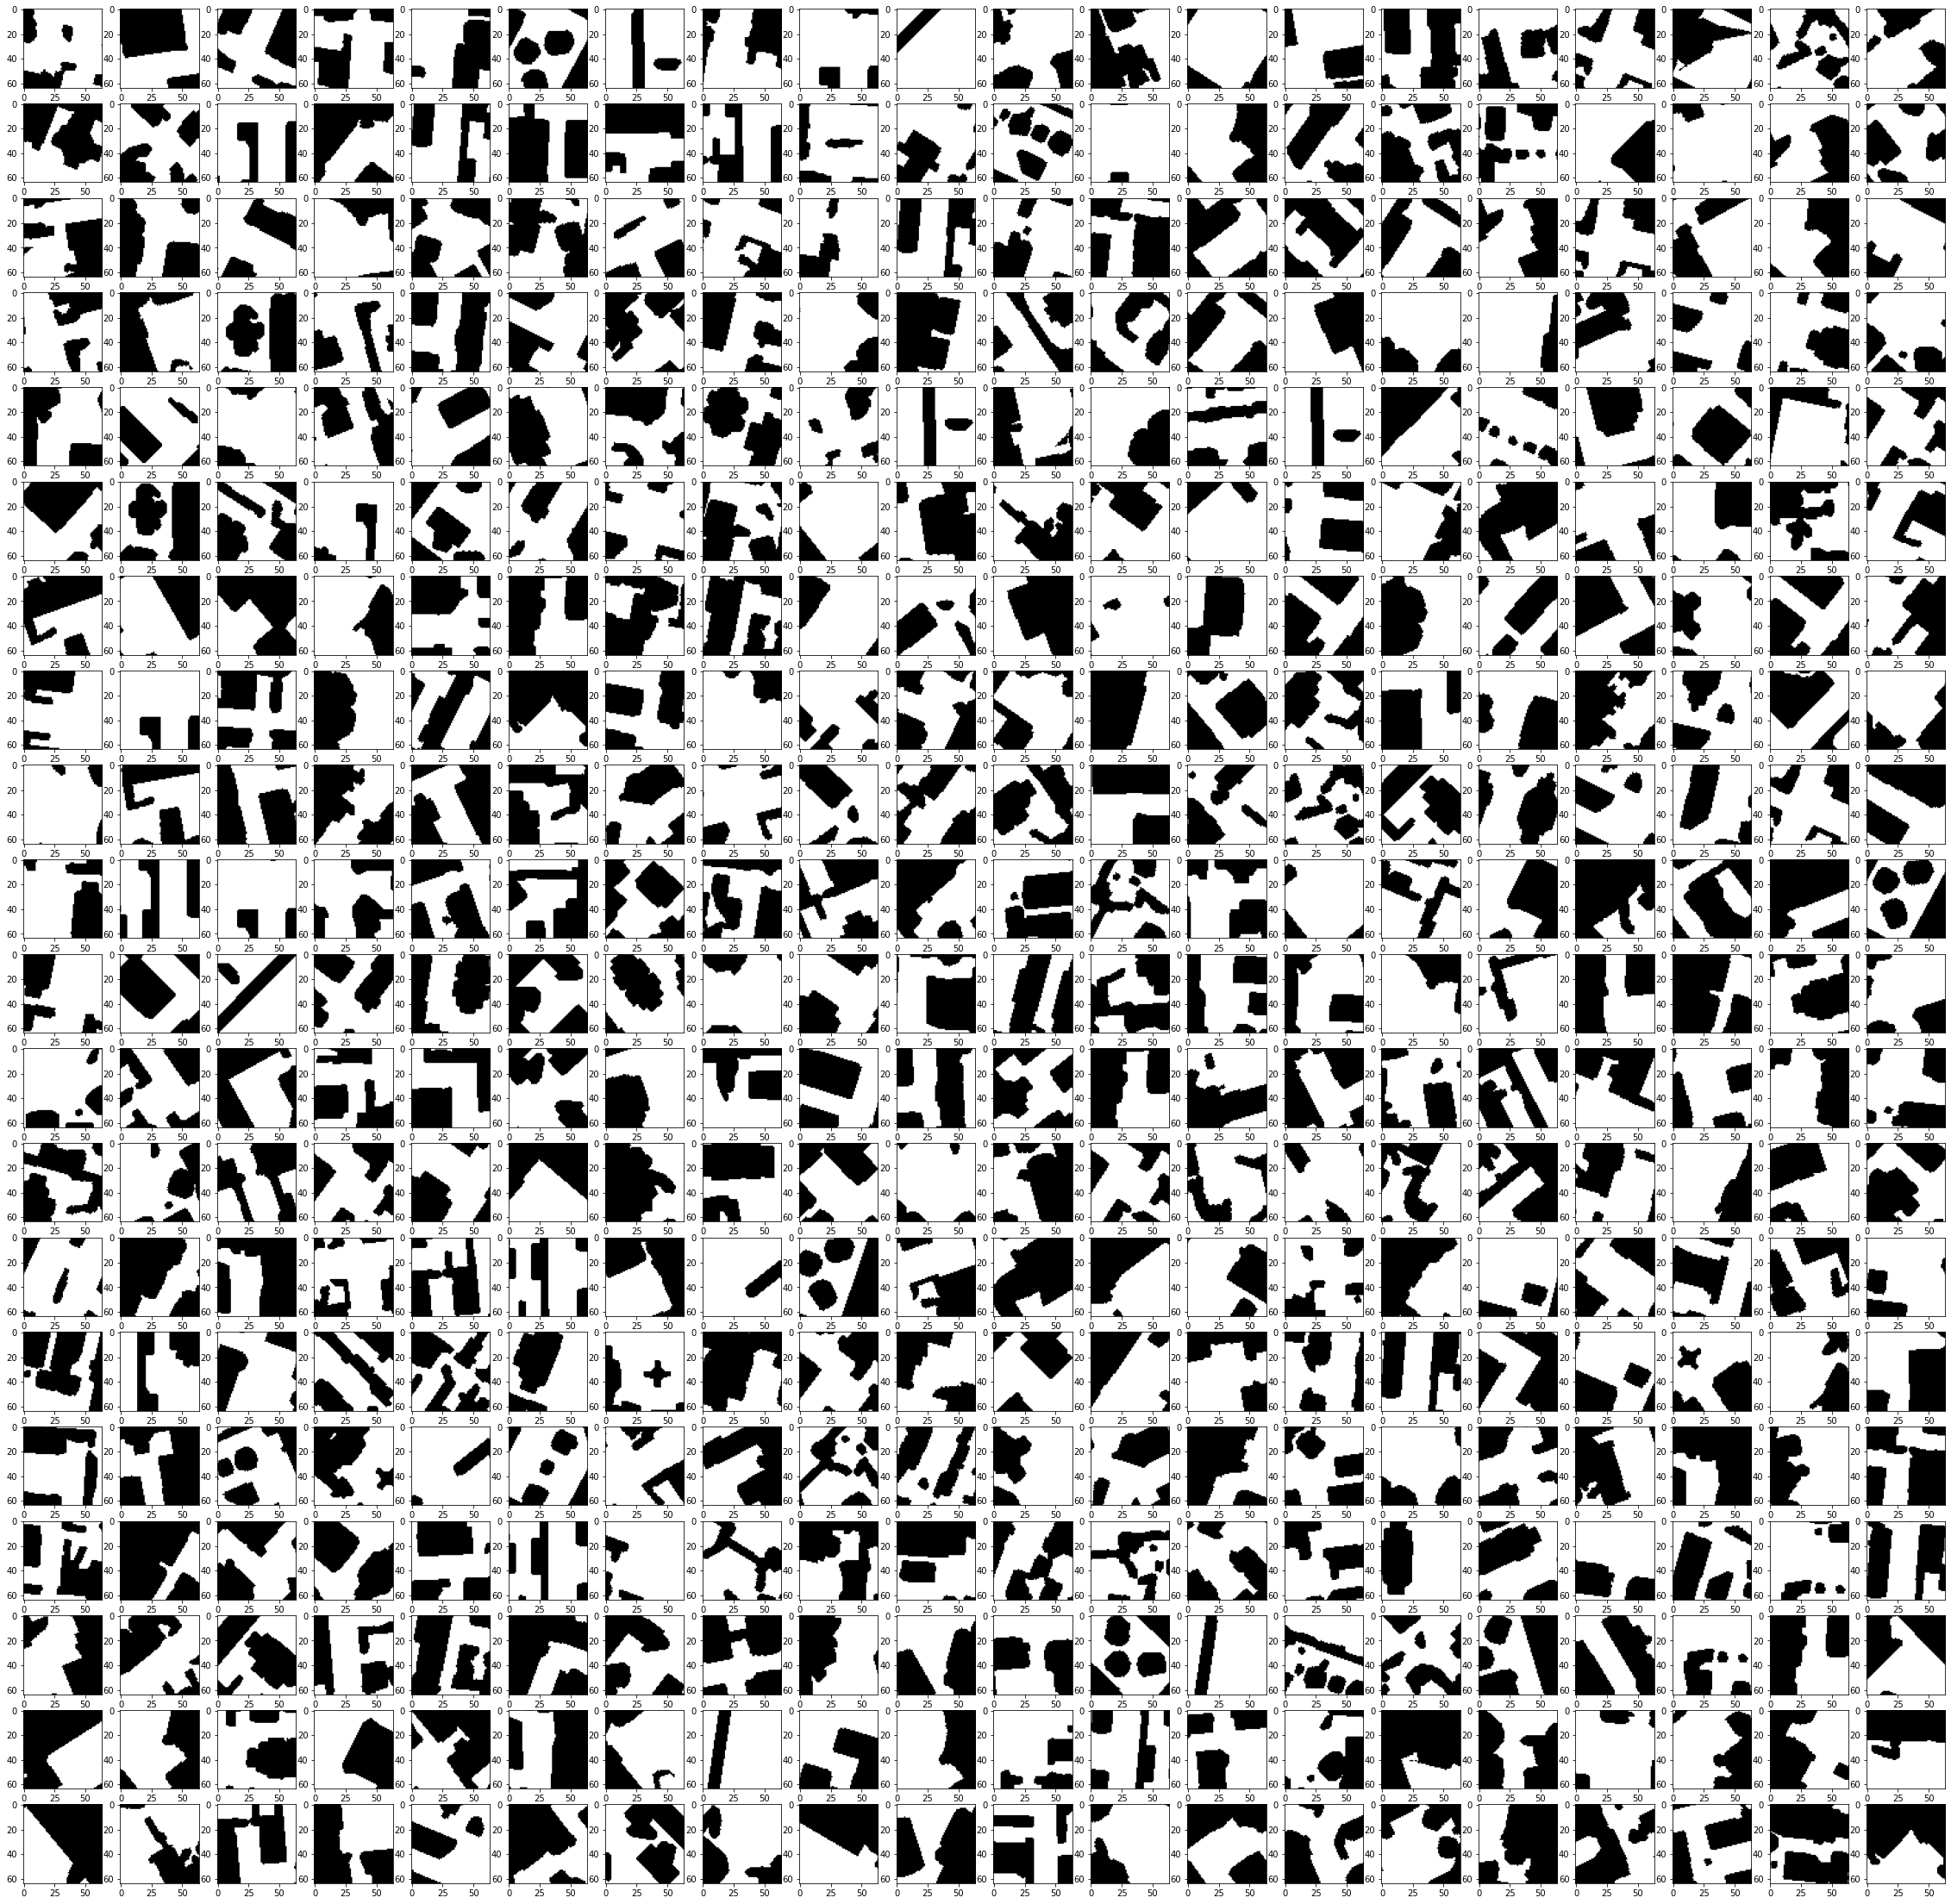

In [84]:
nrows = 20
ncols = 20

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(2*ncols, 2*nrows))
ax = ax.flatten()

bev_dir = '/scratch/shantanu/HabitatGibson/bevs/sim'

random.shuffle(valid_train_fps)

for idx in range(nrows * ncols):
    scene, fileidx = valid_train_fps[idx].split()
    img_path = os.path.join(bev_dir, scene, '0', 'bev', '{}.png'.format(fileidx))
    img = cv2.imread(img_path, -1)
    ax[idx].imshow(img, 'gray')
    
plt.show()

## Split file

In [29]:
data_dir = '/scratch/shantanu/HabitatGibson/data'
semantics_dir = '/scratch/shantanu/HabitatGibson/data'

In [30]:
floor_frac_thresh = 0.05
valid_fps = []

for scene in os.listdir(semantics_dir):
    filenames = sorted(os.listdir(os.path.join(semantics_dir, scene, '0', 'left_semantic')), 
                         key=lambda x: int(os.path.splitext(x)[0]))
    for filename in filenames:
        fileidx = int(os.path.splitext(filename)[0])
        avg_floor_frac = 0
        
        semantics_path = os.path.join(semantics_dir, scene, '0', 'left_semantic', '{}.png'.format(fileidx))
        semantics_img = cv2.imread(semantics_path, -1)
        floor_frac = np.sum(semantics_img == floor_label)/semantics_img.size

        if floor_frac >= floor_frac_thresh:
            valid_fps.append(f'{scene} {fileidx}')
            
len(valid_fps)

19241

In [24]:
with open('/scratch/shantanu/HabitatGibson/train_gibson_scenes.txt', 'r') as f:
    train_scenes = f.read().splitlines()
    
with open('/scratch/shantanu/HabitatGibson/val_gibson_scenes.txt', 'r') as f:
    val_scenes = f.read().splitlines()

In [25]:
train_scenes[:5], val_scenes[:5]

(['Allensville', 'Beechwood', 'Benevolence', 'Coffeen', 'Cosmos'],
 ['Collierville', 'Corozal', 'Darden', 'Markleeville', 'Wiconisco'])

In [31]:
frame_idxs = [0, -4, -3, -2, -1, 1, 2, 3, 4]

In [32]:
filtered_fps = []
sample_freq = 1

for fp_idx in range(0, len(valid_fps), sample_freq):
    fp = valid_fps[fp_idx]
    scene, fileidx = fp.split()
    if np.all(['{} {}'.format(scene, int(fileidx) + idx) in valid_fps for idx in frame_idxs]):
        filtered_fps.append(fp)
        
len(filtered_fps)

14203

In [33]:
train_fps = [fp for fp in filtered_fps if fp.split()[0] in train_scenes]
val_fps = [fp for fp in filtered_fps if fp.split()[0] in val_scenes]

len(train_fps), len(val_fps)

(10443, 3760)

In [35]:
with open('../splits/gibson/random_split_8fid_train.txt', 'w') as f:
    f.writelines([fp + '\n' for fp in train_fps])
    
with open('../splits/gibson/random_split_8fid_val.txt', 'w') as f:
    f.writelines([fp + '\n' for fp in val_fps])

# Random Split

In [24]:
scenes = sorted(os.listdir(data_dir))
np.random.seed(456723)

np.random.shuffle(scenes)

train_frac = 0.8
train_scenes = scenes[:int(len(scenes) * train_frac)]
val_scenes = [scene for scene in scenes if scene not in train_scenes]

print('Train: ', train_scenes)
print('Val: ', val_scenes)
print()

train_fps, val_fps = [['{} {}'.format(scene, os.path.splitext(filename)[0])
                      for scene in scenes_split 
                      for filename in os.listdir(os.path.join(data_dir, scene, '0', 'left_rgb'))] for scenes_split in [train_scenes, val_scenes]] 

print('train_fps', len(train_fps))
print('val_fps', len(val_fps))

np.random.seed(0)

Train:  ['Newfields', 'Onaga', 'Collierville', 'Pinesdale', 'Coffeen', 'Marstons', 'Forkland', 'Tolstoy', 'Corozal', 'Markleeville', 'Darden', 'Lakeville', 'Ranchester', 'Beechwood', 'Cosmos', 'Pomaria', 'Mifflinburg', 'Woodbine', 'Leonardo', 'Klickitat', 'Shelbyville', 'Wainscott', 'Merom']
Val:  ['Hanson', 'Lindenwood', 'Allensville', 'Stockman', 'Hiteman', 'Wiconisco']

train_fps 19339
val_fps 6197


# Gibson 4+ splits

In [3]:
import json
import urllib
import pandas as pd

In [4]:
data_dir= '/scratch/shantanu/pavani/hm3d_output/hm3d_output'
partial_occ_dir = '/scratch/shantanu/pavani/hm3d_output/hm3d_dilated_partialmaps/'

scenes = os.listdir(data_dir)
print(len(scenes))
print(scenes[:4])

96
['00899-58NLZxWBSpk', '00810-CrMo8WxCyVb', '00895-auFeVz9Go4m', '00855-c5eTyR3Rxyh']


In [4]:
## RANDOM SPLIT

# seed = 1562712
# np.random.seed(seed)
# np.random.shuffle(scenes)

# print(scenes[:4])

# train_frac = 0.85
# train_scenes = scenes[:int(len(scenes) * train_frac)]
# val_scenes = list(set(scenes) - set(train_scenes))

# print(len(train_scenes), len(val_scenes))

In [5]:
train_scenes = []
test_scenes = []
val_scenes = scenes

In [5]:
# path = '/scratch/pavani/data.json'
url = 'https://raw.githubusercontent.com/StanfordVL/GibsonEnv/master/gibson/data/data.json'
with urllib.request.urlopen(url) as f:
    gibson_split = json.loads(f.read().decode())
print(len(gibson_split))

572


In [6]:
split_key = 'split_tiny'  # [Tiny, Medium, Full, Full+]
train_scenes = [x['id'] for x in gibson_split if x[split_key] == 'train']
val_scenes = [x['id'] for x in gibson_split if x[split_key] == 'val']
test_scenes = [x['id'] for x in gibson_split if x[split_key] == 'test']

print(len(train_scenes), len(val_scenes), len(test_scenes))

25 5 5


In [4]:
url = 'https://raw.githubusercontent.com/niessner/Matterport/master/tasks/benchmark/scenes_{}.txt'

matterport_splits = {'train':None, 'test':None, 'val':None}

for k in matterport_splits.keys():
    with urllib.request.urlopen(url.format(k)) as f:
        matterport_splits[k] = f.read().decode().splitlines()
        print(k, len(matterport_splits[k]))

train_scenes = matterport_splits['train']
val_scenes = matterport_splits['val']
test_scenes = matterport_splits['test']

train 61
test 18
val 11


In [7]:
# split_path = '/home/shantanu.singh/indoor-layout-estimation/splits/gibson4/gibson_v1_split.json'
# split_dict = json.load(open(split_path, 'r'))
# # print(split_dict)

# train_scenes = split_dict['train']
# val_scenes = split_dict['val']
# print(len(train_scenes), len(val_scenes))

In [ ]:
scene_known_area = {}

cam_poses = ['front', 'back', 'left', 'right']

for scene in scenes:
    pose_known_perct = {}
    for pose in cam_poses:
        map_dir = os.path.join(partial_occ_dir, scene, pose, 'partial_occ')
        filenames = sorted(os.listdir(map_dir), key=lambda x: int(os.path.splitext(x)[0]))
        
        file_known_pct = []
        for filename in filenames:
            bev = cv2.imread(os.path.join(map_dir, filename), -1)[64:, 32:96]
            known_pixels = np.sum(np.logical_or(bev==127, bev==255))
            file_known_pct.append(known_pixels/bev.size)
            
        pose_known_perct[pose] = file_known_pct
        
    scene_known_area[scene] = pose_known_perct

In [ ]:
# np.save('/home/shantanu.singh/indoor-layout-estimation/splits/gibson4/scene_known_perct.npy', scene_known_area)

scene_known_area = np.load('/home/shantanu.singh/indoor-layout-estimation/splits/gibson4/scene_known_perct.npy', allow_pickle=True).item()

In [32]:
scene_known_areas = []
for scene_idx, scene in enumerate(scenes):
    known_area = [scene]
    for idx, pose in enumerate(cam_poses):
        vals = scene_known_area[scene][pose]
        known_area.append(np.median(vals))
    scene_known_areas.append(known_area)
    
df = pd.DataFrame(scene_known_areas, columns=['scene', *cam_poses])
df.sort_values('front', inplace=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', '{:,.3f}'.format):  # more options can be specified also
    print(df)

           scene  front  back  left  right
47         Sands  0.005 0.019 0.015  0.014
20     Nemacolin  0.062 0.073 0.053  0.023
34  Stanleyville  0.084 0.052 0.067  0.019
61         Nuevo  0.086 0.056 0.067  0.035
48     Applewold  0.092 0.070 0.089  0.040
58      Arkansaw  0.095 0.082 0.035  0.062
56     Spotswood  0.110 0.119 0.094  0.035
15         Silas  0.147 0.152 0.154  0.152
39   Albertville  0.151 0.169 0.058  0.153
73      Micanopy  0.160 0.175 0.110  0.174
18         Goffs  0.166 0.156 0.092  0.049
25       Nimmons  0.167 0.155 0.076  0.090
75         Mesic  0.184 0.131 0.068  0.126
43   Mifflintown  0.190 0.186 0.079  0.318
79    Hainesburg  0.193 0.237 0.209  0.064
38    Capistrano  0.215 0.201 0.107  0.212
59        Convoy  0.231 0.192 0.121  0.172
30      Sargents  0.237 0.157 0.152  0.274
60       Crandon  0.246 0.263 0.133  0.236
28      Mosquito  0.247 0.231 0.183  0.124
2         Stokes  0.259 0.235 0.152  0.150
42  Spencerville  0.261 0.306 0.213  0.249
72       Pl

In [24]:
low_visible_scenes = df[df['front'] < 0.1]['scene'].tolist()
print(low_visible_scenes)

['Sands', 'Nemacolin', 'Stanleyville', 'Nuevo', 'Applewold', 'Arkansaw']


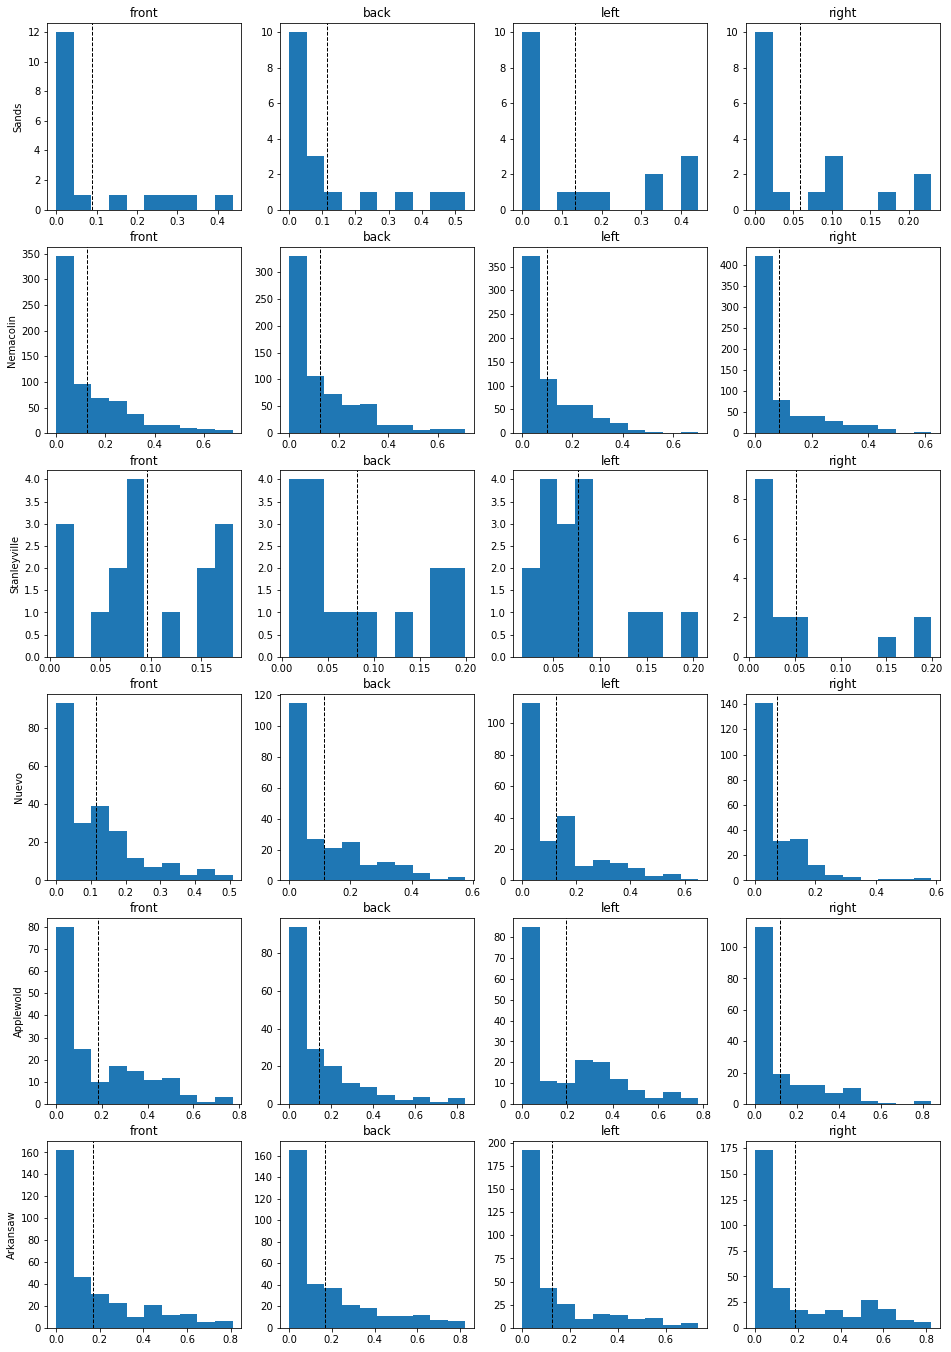

In [25]:
# np.random.shuffle(scenes)

# nrows = 5
# tgtscenes = scenes[:nrows]
nrows = len(low_visible_scenes)
tgtscenes = low_visible_scenes

fig, ax = plt.subplots(ncols=4, nrows=nrows, figsize=(4*4, 4*nrows))

for scene_idx, scene in enumerate(tgtscenes):
    for idx, pose in enumerate(cam_poses):
        ax[scene_idx][idx].hist(scene_known_area[scene][pose], bins=10)
        ax[scene_idx][idx].axvline(np.mean(scene_known_area[scene][pose]), color='k', linestyle='dashed', linewidth=1)
        ax[scene_idx][idx].set_title(pose)
        
    ax[scene_idx][0].set_ylabel(scene)

    
plt.show()

#### Prepare split file

In [9]:
os.path.join(data_dir, scene, '0', pose, 'DEPTH')

'/scratch/shantanu/pavani/hm3d_output/hm3d_output/00899-58NLZxWBSpk/0/front/DEPTH'

In [11]:
from multiprocessing import Pool

In [29]:
valid_cam_fps = {'front':[]} #, 'back':[], 'left':[], 'right':[]}
known_threshold = 0.1

depth_missing_threshold = 0.05

valid_cam_pcts = {}

def valid_file(paths):
    depth_path, map_path = paths.split(' ')
    depth = cv2.imread(depth_path, -1)
    missing_depth_ratio = np.sum(depth == 0) / depth.size

    bev = cv2.imread(map_path, -1)[64:, 32:96]
    known_pixels_ratio = np.sum(np.logical_or(bev==127, bev==255))/bev.size
    out_arr = np.zeros(5)
    if (known_pixels_ratio >= known_threshold) and (missing_depth_ratio <= depth_missing_threshold):
        out_arr[0] = 1
        out_arr[1] = (np.sum(bev==0)/bev.size)
        out_arr[2] = np.sum(bev==127)/bev.size
        out_arr[3] = np.sum(bev==255)/bev.size
        out_arr[4] = missing_depth_ratio
        
    return out_arr


for pose in valid_cam_fps.keys():
    valid_fps = []
    cls_pct = {'unknown': [], 'occ': [], 'free': [], 'depth_ratio': []}
    for scene in scenes:
        map_dir = os.path.join(partial_occ_dir, scene, pose, 'partial_occ')
        depth_dir = os.path.join(data_dir, scene, '1000', pose, 'DEPTH')
        filenames = sorted(os.listdir(map_dir), key=lambda x: int(os.path.splitext(x)[0]))
        
        all_fps = ['{} {}'.format(scene, int(os.path.splitext(filename)[0])) for filename in filenames]
        
        process_args = ['{} {}'.format(os.path.join(depth_dir, filename), 
                                       os.path.join(map_dir, filename)) for filename in filenames]
        
        with Pool(processes=10) as p:
            stats = p.map(valid_file, process_args)
            
        stats = np.array(stats)
        
        valid = stats[:, 0] == 1
        
        valid_fps.extend(np.array(all_fps)[valid])
        cls_pct['unknown'].extend(stats[valid, 1])
        cls_pct['occ'].extend(stats[valid, 2])
        cls_pct['free'].extend(stats[valid, 3])
        cls_pct['depth_ratio'].extend(stats[valid, 4])
        
    valid_cam_fps[pose] = valid_fps
                
    valid_cam_pcts[pose] = cls_pct
        

In [30]:
mean_cls_pct = lambda x: [np.mean(x[key]) for key in ['unknown', 'occ', 'free', 'depth_ratio']]
print([[pose, len(valid_cam_fps[pose]), *mean_cls_pct(valid_cam_pcts[pose])] for pose in valid_cam_fps.keys()])

[['front', 32471, 0.3851469598593745, 0.2744396562509624, 0.3404133838896631, 0.0027478692903924276]]


(array([27789.,  1780.,   914.,   576.,   428.,   321.,   224.,   194.,
          144.,   101.]),
 array([0.        , 0.00498638, 0.00997276, 0.01495914, 0.01994553,
        0.02493191, 0.02991829, 0.03490467, 0.03989105, 0.04487743,
        0.04986382]),
 <BarContainer object of 10 artists>)

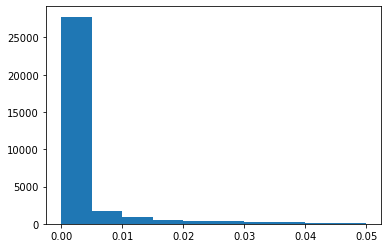

In [31]:
plt.hist(valid_cam_pcts['front']['depth_ratio'])

In [32]:
train_fps = []
val_fps = []
test_fps = []

for pose in valid_cam_fps:
    for fp in valid_cam_fps[pose]:
        scene, fileidx = fp.split(' ')
        if scene in train_scenes:
            train_fps.append(f'{scene} {pose} {fileidx}')
        elif scene in val_scenes:
            val_fps.append(f'{scene} {pose} {fileidx}')
        else:
            test_fps.append(f'{scene} {pose} {fileidx}')
            
print(len(train_fps), len(val_fps), len(test_fps))

0 32471 0


In [33]:
os.makedirs('../splits/hm3d', exist_ok=True)

In [34]:
# with open('../splits/hm3d/filtered_front_train_files.txt', 'w') as f:
#     f.writelines([fp + '\n' for fp in train_fps])
    
with open('../splits/hm3d/filtered_front_val_files.txt', 'w') as f:
    f.writelines([fp + '\n' for fp in val_fps])
    
# with open('../splits/gibson4/front_test_files.txt', 'w') as f:
#     f.writelines([fp + '\n' for fp in test_fps])

# Data augmentation

In [3]:
import albumentations as A

In [4]:
data_dir = '/scratch/shantanu/HabitatGibson/data'
bev_dir = '/scratch/shantanu/results/chandrakar'
print(os.listdir(data_dir))

['Darden', 'Newfields', 'Mifflinburg', 'Pomaria', 'Merom', 'Ranchester', 'Lakeville', 'Onaga', 'Marstons', 'Allensville', 'Cosmos', 'Markleeville', 'Hiteman', 'Lindenwood', 'Collierville', 'Leonardo', 'Wainscott', 'Shelbyville', 'Beechwood', 'Tolstoy', 'Corozal', 'Forkland', 'Stockman', 'Pinesdale', 'Hanson', 'Woodbine', 'Wiconisco', 'Coffeen', 'Klickitat']


In [5]:
scene = 'Darden'
idx = 400

In [6]:
rgb = cv2.cvtColor(cv2.imread(os.path.join(data_dir, scene, '0', 'left_rgb', f'{idx}.jpg'), -1), cv2.COLOR_BGR2RGB)
depth = cv2.imread(os.path.join(data_dir, scene, '0', 'left_depth', f'{idx}.png'), -1).astype(np.float32)/6553.5

if '0' in os.listdir(os.path.join(bev_dir, scene)):
    subdir = os.path.join('0', os.listdir(os.path.join(bev_dir, scene, '0'))[0])
else:
    subdir = ''

bev = cv2.imread(os.path.join(bev_dir, scene, subdir, f'{idx}.png'), -1)
bev[0, 0] = 0

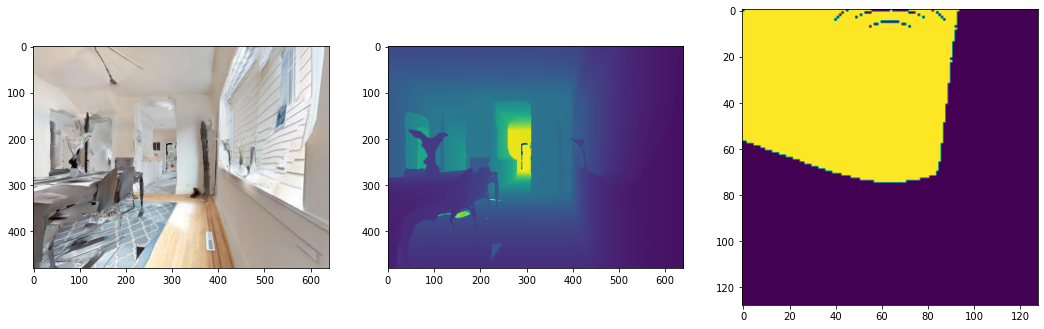

In [7]:
fig, ax = plt.subplots(ncols=3, figsize=(18, 6))
ax[0].imshow(rgb)
ax[1].imshow(depth)
ax[2].imshow(bev)

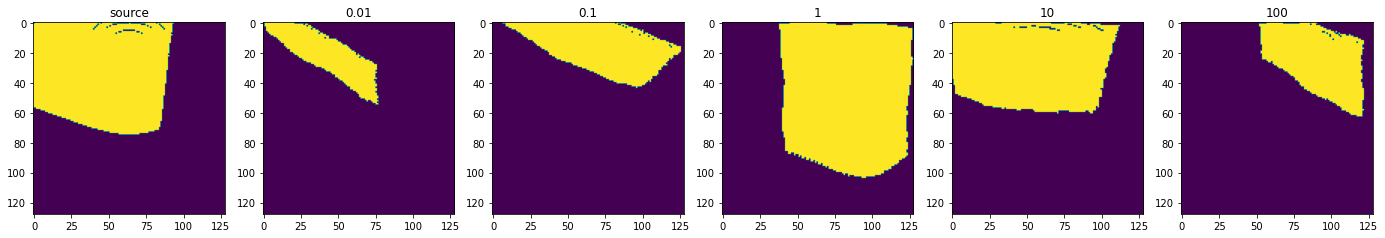

In [72]:
src = bev
tgts = []

aug_params = [0.01, 0.1, 1, 10, 100]
for param in aug_params:
    aug = A.Compose([
        A.augmentations.geometric.ElasticTransform(alpha=50, sigma=8, interpolation=cv2.INTER_NEAREST,
                                                  border_mode=cv2.BORDER_CONSTANT, value=0, always_apply=True)
    ])
    tgts.append(aug(image=src)['image'])
    
ncols = len(tgts) + 1
fig, axes = plt.subplots(ncols=ncols, figsize=(4*ncols, 4))

axes[0].imshow(src)
axes[0].set_title('source')

for idx, tgt in enumerate(tgts):
    axes[idx+1].imshow(tgt)
    axes[idx+1].set_title(aug_params[idx])
    

Text(0.5, 0.98, 'Scale_0.3')

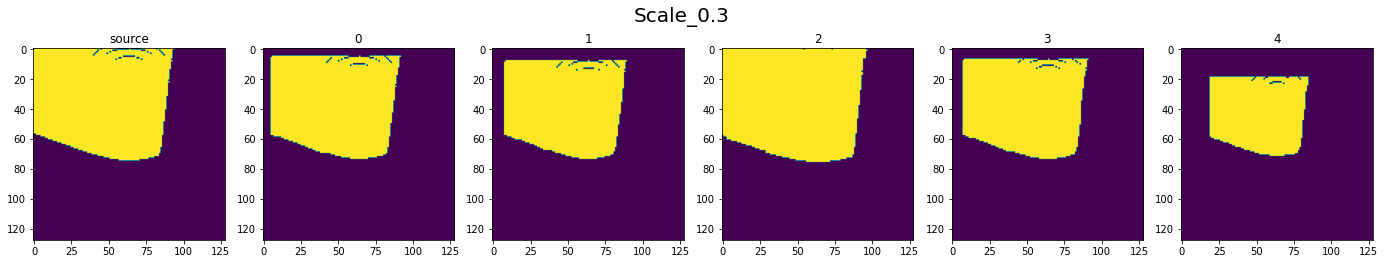

In [35]:
src = bev
tgts = []

aug_params = range(5)
for param in aug_params:
    aug = A.Compose([
        A.augmentations.geometric.ShiftScaleRotate(shift_limit=0, scale_limit=0.3, rotate_limit=0, 
                                                   interpolation=cv2.INTER_NEAREST, 
                                                   border_mode=cv2.BORDER_CONSTANT, value=0, always_apply=True)
    ])
    tgts.append(aug(image=src)['image'])
    
ncols = len(tgts) + 1
fig, axes = plt.subplots(ncols=ncols, figsize=(4*ncols, 4))

axes[0].imshow(src)
axes[0].set_title('source')

for idx, tgt in enumerate(tgts):
    axes[idx+1].imshow(tgt)
    axes[idx+1].set_title(aug_params[idx])
    
plt.suptitle('Scale_0.3', fontsize=20)

Text(0.5, 0.98, 'CoarseDropout_32x32')

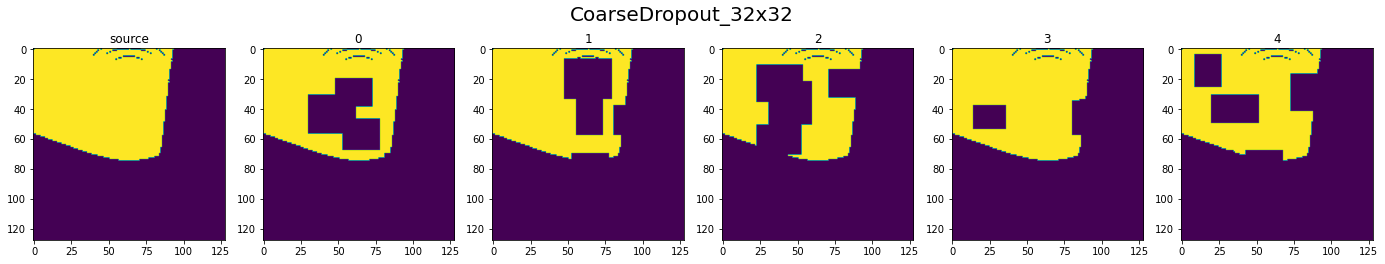

In [12]:
src = bev
tgts = []

aug_params = range(5) #[0.01, 0.1, 1, 10, 100]
for param in aug_params:
    aug = A.Compose([
        A.augmentations.CoarseDropout(max_holes=8, max_height=32, max_width=32, min_holes=4, min_height=16, min_width=16, always_apply=True)
    ])
    tgts.append(aug(image=src)['image'])
    
ncols = len(tgts) + 1
fig, axes = plt.subplots(ncols=ncols, figsize=(4*ncols, 4))

axes[0].imshow(src)
axes[0].set_title('source')

for idx, tgt in enumerate(tgts):
    axes[idx+1].imshow(tgt)
    axes[idx+1].set_title(aug_params[idx])
    
plt.suptitle('CoarseDropout_32x32', fontsize=20)

Text(0.5, 0.98, 'Grid Distortion')

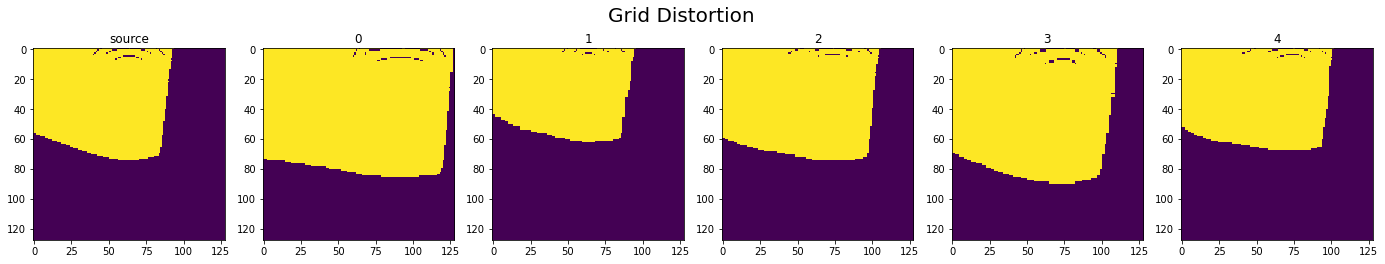

In [27]:
src = bev
tgts = []

aug_params = range(5) #np.arange(0.05,0.5,0.05)
for param in aug_params:
    aug = A.Compose([
        A.augmentations.GridDistortion(num_steps=7, distort_limit=0.5, 
                                       interpolation=cv2.INTER_NEAREST, border_mode=cv2.BORDER_CONSTANT, 
                                       value=0, always_apply=True)
    ])
    tgts.append(aug(image=src)['image'])
    
ncols = len(tgts) + 1
fig, axes = plt.subplots(ncols=ncols, figsize=(4*ncols, 4))

axes[0].imshow(src, interpolation='nearest')
axes[0].set_title('source')

for idx, tgt in enumerate(tgts):
    axes[idx+1].imshow(tgt, interpolation='nearest')
    axes[idx+1].set_title(aug_params[idx])
    
plt.suptitle('Grid Distortion', fontsize=20)

Text(0.5, 0.98, 'Affine')

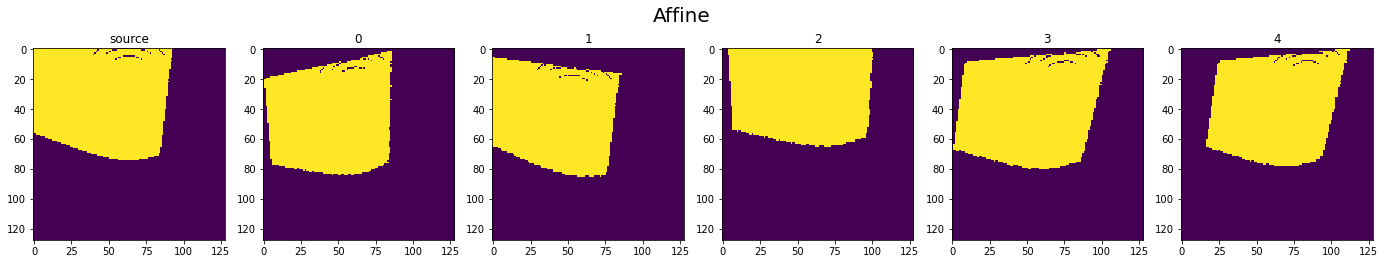

In [29]:
src = bev
tgts = []

aug_params = range(5) #np.arange(0.05,0.5,0.05)
for param in aug_params:
    aug = A.Compose([
        A.augmentations.Affine(scale=[0.9, 1.1], translate_percent=[-0.1, 0.1], rotate=[-10,10], shear=(-10, 10), 
                              interpolation=cv2.INTER_NEAREST, cval=0, always_apply=True)
    ])
    tgts.append(aug(image=src)['image'])
    
ncols = len(tgts) + 1
fig, axes = plt.subplots(ncols=ncols, figsize=(4*ncols, 4))

axes[0].imshow(src, interpolation='nearest')
axes[0].set_title('source')

for idx, tgt in enumerate(tgts):
    axes[idx+1].imshow(tgt, interpolation='nearest')
    axes[idx+1].set_title(aug_params[idx])
    
plt.suptitle('Affine', fontsize=20)